# Clustering
## Using PCA and k-means

In [223]:
#Important imports for easy clustering.
import numpy as np
import math

#For importing data*
from datascience import *

#For plotting progress
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from mpl_toolkits.mplot3d import Axes3D

# *The data science library was used as a simple and lightweight package from the UC Berkeley course Data 8
# Check out http://data8.org/ for more information!

In [224]:
movies = Table.read_table("movies.csv").sort("Genre")
movies.select("Title", "Genre", "hi").show(2)

action = movies.where("Genre", "action").column("Title")
romance = movies.where("Genre", "romance").column("Title")

Title,Genre,hi
the terminator,action,0.00108167
batman,action,0.0038787


In [225]:
discard = ["Title", "Genre", "Year", "Rating", "# Votes", "# Words"]

movies_transpose = Table()
titles = movies.column("Title")
word_frequencies = movies.drop(discard)

for i in range(movies.num_rows):
    movies_transpose = movies_transpose.with_column(titles[i], word_frequencies.row(i))
    
movies_transpose.select("the terminator", "batman", "the mummy").show(3)

the terminator,batman,the mummy
0.0400216,0.051481,0.035313
0.0438075,0.0338505,0.0478331
0.0254191,0.0239774,0.0324238


In [154]:
movies_transpose.to_csv("movies_transpose.csv")

In [226]:
movie_matrix = []

for i in range(movies_transpose.num_columns):
    movie_matrix.append(np.ndarray.tolist(movies_transpose.column(i)))
    
movie_matrix = np.matrix(movie_matrix)
movie_matrix.shape

(236, 5000)

In [227]:
U, S, VT = np.linalg.svd(movie_matrix)
S.shape

(236,)

In [228]:
movie_mean = np.mean(movie_matrix)
demeaned_movies = movie_matrix - movie_mean

In [229]:
action_table = movies_transpose.select(action)
romance_table = movies_transpose.select(romance)

action_matrix = []
romance_matrix = []

for i in range(action_table.num_columns):
    action_matrix.append(np.ndarray.tolist(action_table.column(i)))
    
for i in range(romance_table.num_columns):
    romance_matrix.append(np.ndarray.tolist(romance_table.column(i)))
    
action_matrix = np.matrix(action_matrix)
action_matrix = action_matrix.T - movie_mean

romance_matrix = np.matrix(romance_matrix)
romance_matrix = romance_matrix.T - movie_mean

(-1, 10)

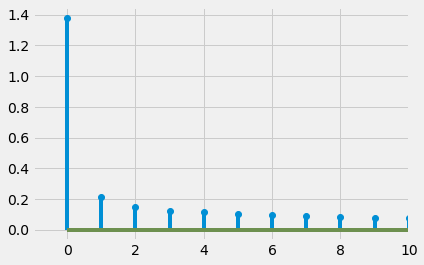

In [230]:
plots.stem(S)
plots.xlim([-1,10])

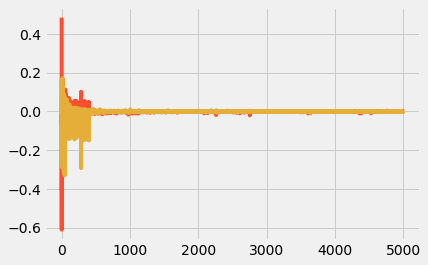

In [231]:
basis = VT[:3].T
plots.plot(basis)

In [271]:
basis.shape

(5000, 3)

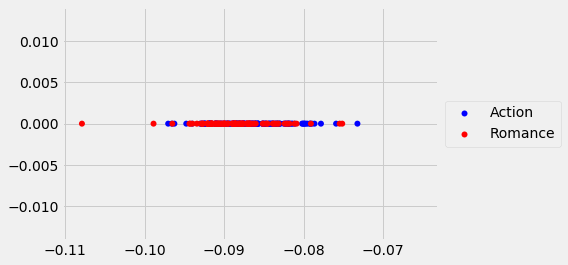

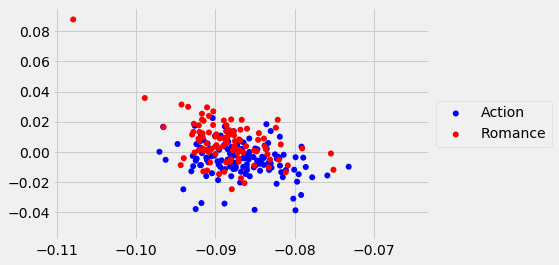

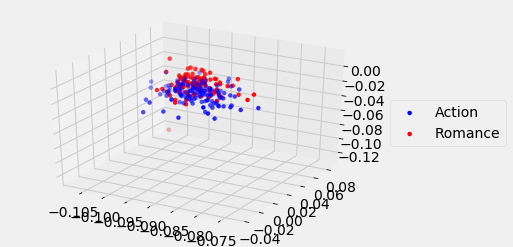

In [233]:
proj = np.dot(demeaned_movies, basis)

x0 = np.ndarray.tolist(proj[:len(action),0].T)[0]
y0 = np.ndarray.tolist(proj[:len(action),1].T)[0]
z0 = np.ndarray.tolist(proj[:len(action),2].T)[0]
x1 = np.ndarray.tolist(proj[len(action):,0].T)[0]
y1 = np.ndarray.tolist(proj[len(action):,1].T)[0]
z1 = np.ndarray.tolist(proj[len(action):,2].T)[0]

plots.scatter(x0, np.zeros(len(x0)), c=['blue'], edgecolor='none')
plots.scatter(x1, np.zeros(len(x1)), c=['red'], edgecolor='none')
plots.legend(['Action', 'Romance'],loc='center left', bbox_to_anchor=(1, 0.5))
plots.show()

plots.scatter(x0, y0, c=['blue'], edgecolor='none')
plots.scatter(x1, y1, c=['red'], edgecolor='none')
plots.legend(['Action', 'Romance'],loc='center left', bbox_to_anchor=(1, 0.5))
plots.show()

ax = plots.figure().add_subplot(111, projection='3d')
ax.scatter(x0, y0, z0, c=['blue'], edgecolor='none')
ax.scatter(x1, y1, z1, c=['red'], edgecolor='none')
ax.legend(['Action', 'Romance'],loc='center left', bbox_to_anchor=(1, 0.5))

In [238]:
def distance(x0, y0, x1, y1):
    return (((x0 - x1) ** 2) + ((y0 - y1) ** 2)) ** (1/2)

def cluster(x0_arr, y0_arr, x0, y0, x1, y1):
    new_x0 = []
    new_y0 = []
    new_x1 = []
    new_y1 = []
    for p in range(len(x0_arr)):
        d0 = distance(x0_arr[p], y0_arr[p], x0, y0)
        d1 = distance(x0_arr[p], y0_arr[p], x1, y1)
        if d0 < d1:
            new_x0.append(x0_arr[p])
            new_y0.append(y0_arr[p])
        else:
            new_x1.append(x0_arr[p])
            new_y1.append(y0_arr[p])
    return np.mean(np.asarray(new_x0)), np.mean(np.asarray(new_y0)), np.mean(np.asarray(new_x1)), np.mean(np.asarray(new_y1))

def two_means(x_arr, y_arr):
    old_x0, old_y0, old_x1, old_y1 = 0, 0, 0, 0
    
    new_x0 = -0.09
    new_y0 = -0.04
    new_x1 = -0.09
    new_y1 = 0.04
    
    while old_x0 != new_x0 or old_x1 != new_x1 or old_y0 != new_y0 or old_y1 != new_y1:
        old_x0, old_y0, old_x1, old_y1 = new_x0, new_y0, new_x1, new_y1
        new_x0, new_y0, new_x1, new_y1 = cluster(x_arr, y_arr, old_x0, old_y0, old_x1, old_y1)
        print(old_x0, old_y0, old_x1, old_y1)
        print(new_x0, new_y0, new_x1, new_y1)
        
    return new_x0, new_x1, new_y0, new_y1

In [241]:
all_x = np.ndarray.tolist(proj.T)[0]
all_y = np.ndarray.tolist(proj.T)[1]

centroids = two_means(all_x, all_y)
centroids

-0.09 -0.04 -0.09 0.04
-0.08623903644249731 -0.009886695038045658 -0.08895540393441595 0.010424926732045998
-0.08623903644249731 -0.009886695038045658 -0.08895540393441595 0.010424926732045998
-0.08614684202138762 -0.009878561036101343 -0.08905240849923571 0.010416368347391545
-0.08614684202138762 -0.009878561036101343 -0.08905240849923571 0.010416368347391545
-0.08614684202138762 -0.009878561036101343 -0.08905240849923571 0.010416368347391545


(-0.08614684202138762,
 -0.08905240849923571,
 -0.009878561036101343,
 0.010416368347391545)

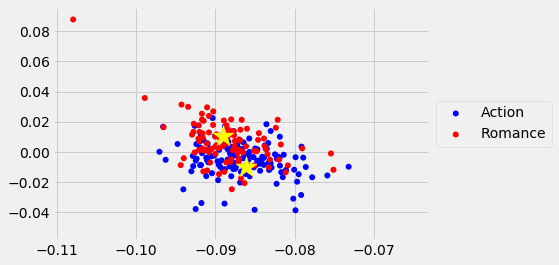

In [303]:
plots.scatter(x0, y0, c=['blue'], edgecolor='none')
plots.scatter(x1, y1, c=['red'], edgecolor='none')
plots.scatter(centroids[:2], centroids[2:], s=500, marker="*", c=['yellow'])
plots.legend(['Action', 'Romance'],loc='center left', bbox_to_anchor=(1, 0.5))
plots.show()

In [333]:
def kmeans_classify(row, k=0, train_words=None):
    romance_point = centroids[2:]
    action_point = centroids[:2]
    vec = np.dot(row - movie_mean, basis)
    d0 = distance(vec.item(0), vec.item(1), action_point[0], action_point[1])
    d1 = distance(vec.item(0), vec.item(1), romance_point[0], romance_point[1])
    if d0 > d1:
        return "action"
    else:
        return "romance"

In [334]:
kmeans_classify(movies.drop(discard).row(4))

'action'

In [339]:
movies = Table.read_table("movies.csv")

In [340]:
training_movies = ['the terminator', 'batman', 'tomorrow never dies', 'batman forever',
       'supergirl', 'the avengers', 'natural born killers',
       'airplane ii: the sequel', 'willow', 'fast times at ridgemont high',
       'shakespeare in love', 'superman', 'the crow: salvation',
       'die hard', 'from dusk till dawn', 'highlander iii: the sorcerer',
       'austin powers: international man of mystery', 'catwoman',
       'never been kissed', 'dark angel',
       'the adventures of buckaroo banzai across the 8th dimension',
       'natural born killers', 'arctic blue', 'the beach', 'true lies',
       'hellboy', 'only you', 'man on fire', 'titanic', 'hudson hawk',
       'the abyss', 'buffy the vampire slayer', 'braveheart',
       'mighty morphin power rangers', 'demolition man', 'runaway bride',
       'metro', 'seven', 'bull durham', 'conspiracy theory', 'hackers',
       'wild at heart', 'ronin', 'being john malkovich',
       'crouching tiger hidden dragon', 'mystery men', 'bloodmoon',
       'tombstone', 'star trek v: the final frontier', 'the fifth element',
       'ninotchka', 'jurassic park', 'trouble in paradise', 'tron',
       'gone in sixty seconds', 'cellular', 'smokey and the bandit',
       'alien vs. predator', 'barry lyndon', 'little nicky',
       'the princess bride', 'who framed roger rabbit',
       'the bridges of madison county', 'reindeer games',
       "my best friend's wedding", 'lone star',
       'the lost world: jurassic park', 'quills', 'the getaway',
       'three kings', 'wild wild west', 'what women want', 'feast',
       'backdraft', 'charade', 'rocky', 'chill factor', 'jerry maguire',
       'total recall', 'true romance', 'highlander', 'mrs brown',
       'broadcast news', 'jurassic park iii', 'vertigo',
       'enemy of the state', 'my girl', 'batman and robin',
       'basic instinct', 'roughshod', 'soldier', 'the thin man',
       'point break', 'the lost son', 'tombstone',
       'terminator 2: judgment day', 'asylum', 'quantum project',
       'manhunt', 'romeo and juliet', 'last of the mohicans',
       'the family man', '15 minutes', 'gattaca', 'grand hotel', 'domino',
       'sideways', 'rush hour 2', 'birthday girl',
       'transatlantic merry-go-round', 'the world is not enough',
       'miami vice', 'the jazz singer', 'harold and maude',
       'snow falling on cedars', 'star trek vi: the undiscovered country',
       'innerspace', 'aliens', 'the rock', 'star trek: the wrath of khan',
       'mission: impossible', 'it happened one night',
       'as good as it gets', 'ticker', 'deep rising', 'the matrix',
       'eternal sunshine of the spotless mind', 'intolerable cruelty',
       'lake placid', 'entrapment', 'bachelor party', 'gladiator',
       'pretty woman', 'the crow', 'the wedding date',
       'star trek iii: the search for spock', 'out of sight',
       'the time machine', 'moonstruck', 'punch-drunk love', 'xxx',
       "it's a wonderful life", 'stranglehold', 'house of the damned',
       'the horse whisperer', 'godzilla', 'star trek: first contact',
       'the boondock saints', 'silverado', 'get carter',
       'an american werewolf in london', 'ghostbusters ii',
       'life as a house', 'an american werewolf in paris', 'strange days',
       'nurse betty', 'planet of the apes', 'pearl harbor',
       'the fabulous baker boys', 'galaxy quest', 'on the waterfront',
       'saving private ryan', 'air force one', 'rebel without a cause',
       'mission: impossible ii', 'casablanca', 'a walk to remember',
       'pearl harbor', 'the french connection', 'predator', 'the graduate',
       'the patriot', 'minority report', "there's something about mary",
       'zulu dawn', 'le grand bleu', 'nuovo cinema paradiso',
       'the man in the iron mask', 'hannah and her sisters',
       'grosse pointe blank', 'the hustler', 'black rain',
       'indiana jones and the temple of doom', 'willow',
       'even cowgirls get the blues', 'the english patient',
       'someone to watch over me',
       'star wars: episode vi - return of the jedi', 'shampoo',
       'rush hour', 'pet sematary ii', 'monkeybone', 'virtuosity',
       'smokey and the bandit', 'starman', 'his girl friday',
       'say anything...', 'fantastic four', 'spider-man',
       'star wars: the empire strikes back', 'star trek: generations',
       'tremors', 'nothing but a man', 'meet john doe', 'the fisher king']

training_set = movies.where("Title", lambda x: x in training_movies)
testing_set = movies.where("Title", lambda x: x not in training_movies)

In [341]:
highest_accuracy_features = make_array("come", "do", "have", "heart", "make", "never", "now", "wanna", "with", "yo")
highest_accuracy_k = 81

hf_train = training_set.select(highest_accuracy_features)
hf_test = testing_set.select(highest_accuracy_features)

In [342]:
def accuracy(features=highest_accuracy_features, trainers=hf_train, classifier=lambda x: "Action", k=highest_accuracy_k):
    train_words = training_set.select(features)
    test_words = testing_set.select(features)
    
    test_guesses = []
    for i in range(test_words.num_rows):
        test_guesses.append(classifier(test_words.row(i), k, train_words))
    test_guesses = np.array(test_guesses)
    test_proportion_correct = np.count_nonzero(testing_set.column("Genre") == test_guesses) / len(test_guesses)
        
    training_guesses = []
    for i in range(train_words.num_rows):
        training_guesses.append(classifier(train_words.row(i), k, train_words))
    
    train_guesses = np.array(test_guesses)
    train_proportion_correct = np.count_nonzero(training_set.column("Genre") == training_guesses) / len(training_guesses)
    
    total_accuracy = ((3/20) * (train_proportion_correct)) + ((17/20) * (test_proportion_correct))
    return test_proportion_correct, train_proportion_correct, total_accuracy

all_features = movies.drop(discard).labels
accuracy(features=all_features, classifier=kmeans_classify)

(0.4444444444444444, 0.441747572815534, 0.44403991370010787)